1. В лабораторной работе № 1 на основе обработки результатов наблюдения
были выдвинуты две различные гипотезы о распределении генеральной
совокупности, из которой извлечена данная выборка. Определить точечные оценки
параметров этих распределений, применяя различные методы.

In [ ]:
import numpy as np
from scipy.stats import norm
from IPython.display import display, Math

# Выборка B
numbers = [
	110, 115, 122, 128, 115, 118, 116, 124, 120, 127, 136, 129, 119, 124, 131, 116, 108, 122, 118, 132, 118, 118, 116, 132, 124, 120, 124, 124, 118, 127, 126, 119, 115, 122, 131, 129, 128,
	122, 103, 125, 115, 122, 114, 109, 132, 122, 121, 129, 108, 111, 104, 115, 105, 135, 132, 133, 119, 137, 126, 102, 114, 109, 125, 121, 112, 131, 115, 122, 118, 116, 130, 126, 131, 127,
	116, 120, 119, 128, 104, 131, 115, 140, 115, 124, 126, 115, 104, 125, 131, 117, 118, 102, 127, 120, 102, 120, 130, 128, 106, 132, 129, 131, 126, 116, 128, 134, 132, 124, 107, 119, 132,
	117, 120, 122, 114, 125, 139, 116, 125, 132, 111, 122, 120, 113, 123, 119, 122, 112, 125, 101, 121, 124, 110, 123, 141, 115, 121, 113, 125, 139, 111, 117, 114, 109, 128, 126, 139, 114,
	123, 125, 123, 118, 129, 123, 124, 122, 123, 120, 115, 115, 127, 115, 114, 133, 128, 123, 104, 124, 105, 124, 112, 135, 117, 127, 134, 117, 120, 97, 123, 105, 108, 119, 112, 114, 133,
	112, 120, 145, 121, 126, 127, 118, 129 ]

data = np.array(numbers)
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=0)

# --- Формулы в LaTeX ---
display(Math(r"\textbf{Оценки параметров (точечные)}"))

# Нормальное распределение
display(Math(r"\text{Нормальное распределение } \mathcal{N}(\mu, \sigma^2):"))
display(Math(r"\hat{\mu} = \overline{X} = %.3f" % mean))
display(Math(r"\hat{\sigma} = \sqrt{\frac{1}{n} \sum (x_i - \overline{X})^2} = %.3f" % std))

# Пуассоновское распределение
display(Math(r"\text{Распределение Пуассона } \mathrm{Pois}(\lambda):"))
display(Math(r"\hat{\lambda} = \overline{X} = %.3f" % mean))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

2. Вычислить теоретические частоты теоретических распределений используя
функции плотности вероятности выбранных теоретических распределений.
Вычислить теоретические частоты нормального распределения используя функцию
распределения

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from collections import Counter

# Данные
data = np.array(numbers)
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=0)
lambda_hat = mean  # для Пуассона

# Интервалы по Стерджесу
k = int(1 + 3.322 * np.log10(n))
min_val, max_val = min(data), max(data)
bins = np.linspace(min_val, max_val, k + 1)

# Эмпирическая гистограмма
hist, _ = np.histogram(data, bins)

# Теоретические частоты (нормальное)
norm_probs = [norm.cdf(bins[i+1], mean, std) - norm.cdf(bins[i], mean, std) for i in range(k)]
norm_theoretical = [round(p * n, 2) for p in norm_probs]

# Теоретические частоты (Пуассон, дискретно по уникальным значениям)
value_counts = Counter(data)
x_vals = sorted(value_counts.keys())
poisson_theoretical = [round(poisson.pmf(x, lambda_hat) * n, 2) for x in x_vals]

# --- Таблица интервалов и частот ---
print("Интервалы (нормальное):")
for i in range(k):
    a, b = bins[i], bins[i+1]
    print(f"[{a:.1f}, {b:.1f}): Эмпирическая = {hist[i]}, Теоретическая (норм.) = {norm_theoretical[i]}")

# --- Таблица значений и Пуассона ---
print("\nЗначения (Пуассон):")
for x, freq in zip(x_vals, poisson_theoretical):
    print(f"x = {x}: Теоретическая частота (Пуассон) = {freq}")


Интервалы (нормальное):
[97.0, 103.0): Эмпирическая = 5, Теоретическая (норм.) = 3.43
[103.0, 109.0): Эмпирическая = 13, Теоретическая (норм.) = 12.92
[109.0, 115.0): Эмпирическая = 22, Теоретическая (норм.) = 31.23
[115.0, 121.0): Эмпирическая = 51, Теоретическая (норм.) = 48.49
[121.0, 127.0): Эмпирическая = 50, Теоретическая (норм.) = 48.39
[127.0, 133.0): Эмпирическая = 37, Теоретическая (норм.) = 31.05
[133.0, 139.0): Эмпирическая = 9, Теоретическая (норм.) = 12.8
[139.0, 145.0): Эмпирическая = 6, Теоретическая (норм.) = 3.39

Значения (Пуассон):
x = 97: Теоретическая частота (Пуассон) = 0.61
x = 101: Теоретическая частота (Пуассон) = 1.33
x = 102: Теоретическая частота (Пуассон) = 1.58
x = 103: Теоретическая частота (Пуассон) = 1.86
x = 104: Теоретическая частота (Пуассон) = 2.16
x = 105: Теоретическая частота (Пуассон) = 2.49
x = 106: Теоретическая частота (Пуассон) = 2.84
x = 107: Теоретическая частота (Пуассон) = 3.21
x = 108: Теоретическая частота (Пуассон) = 3.6
x = 109: Тео

3. На одном графике построить полигоны исходного эмпирического
распределения и двух теоретических с использованием теоретических частот,
вычисленных в п. 2

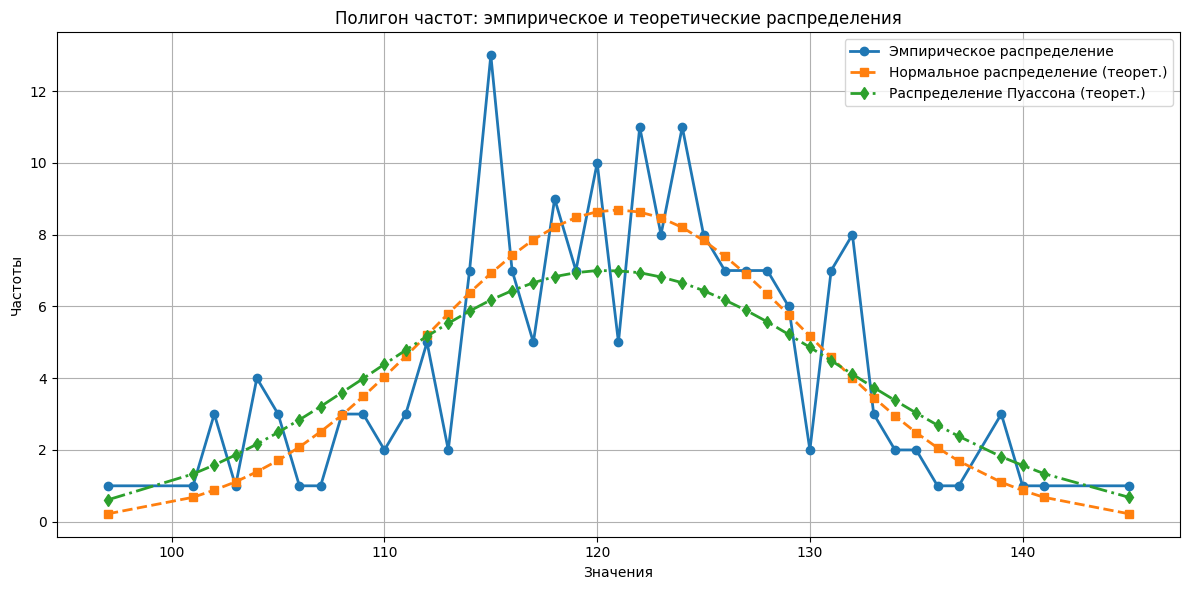

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from collections import Counter

# Данные выборки B
numbers = [
	110, 115, 122, 128, 115, 118, 116, 124, 120, 127, 136, 129, 119, 124, 131, 116, 108, 122, 118, 132, 118, 118, 116, 132, 124, 120, 124, 124, 118, 127, 126, 119, 115, 122, 131, 129, 128,
	122, 103, 125, 115, 122, 114, 109, 132, 122, 121, 129, 108, 111, 104, 115, 105, 135, 132, 133, 119, 137, 126, 102, 114, 109, 125, 121, 112, 131, 115, 122, 118, 116, 130, 126, 131, 127,
	116, 120, 119, 128, 104, 131, 115, 140, 115, 124, 126, 115, 104, 125, 131, 117, 118, 102, 127, 120, 102, 120, 130, 128, 106, 132, 129, 131, 126, 116, 128, 134, 132, 124, 107, 119, 132,
	117, 120, 122, 114, 125, 139, 116, 125, 132, 111, 122, 120, 113, 123, 119, 122, 112, 125, 101, 121, 124, 110, 123, 141, 115, 121, 113, 125, 139, 111, 117, 114, 109, 128, 126, 139, 114,
	123, 125, 123, 118, 129, 123, 124, 122, 123, 120, 115, 115, 127, 115, 114, 133, 128, 123, 104, 124, 105, 124, 112, 135, 117, 127, 134, 117, 120, 97, 123, 105, 108, 119, 112, 114, 133,
	112, 120, 145, 121, 126, 127, 118, 129 ]

data = np.array(numbers)
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=0)
lambda_poisson = mean

# --- Эмпирические частоты ---
emp_counts = Counter(data)
x_vals = sorted(emp_counts.keys())
emp_freqs = [emp_counts[x] for x in x_vals]

# --- Теоретические частоты: Нормальное распределение ---
norm_freqs = [
    round((norm.cdf(x + 0.5, mean, std) - norm.cdf(x - 0.5, mean, std)) * n, 2)
    for x in x_vals
]

# --- Теоретические частоты: Пуассоновское распределение ---
poisson_freqs = [round(poisson.pmf(x, lambda_poisson) * n, 2) for x in x_vals]

# --- Построение полигонов ---
plt.figure(figsize=(12, 6))

# Эмпирическое распределение — линия с маркерами
plt.plot(x_vals, emp_freqs, 'o-', label="Эмпирическое распределение", linewidth=2)

# Теоретическое (нормальное)
plt.plot(x_vals, norm_freqs, 's--', label="Нормальное распределение (теорет.)", linewidth=2)

# Теоретическое (Пуассон)
plt.plot(x_vals, poisson_freqs, 'd-.', label="Распределение Пуассона (теорет.)", linewidth=2)

plt.xlabel("Значения")
plt.ylabel("Частоты")
plt.title("Полигон частот: эмпирическое и теоретические распределения")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



4. Построить точные 95% доверительные интервалы для параметров
нормального распределения и асимптотические доверительные интервалы для
параметров других теоретических распределений (с использованием ЗБЧ и
функционального преобразования)

In [ ]:
import numpy as np
from scipy.stats import t, chi2, norm
from IPython.display import display, Math

# Данные
data = np.array(numbers)
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=1)  # Выборочное стандартное отклонение
var = std**2
alpha = 0.05

# --- Нормальное распределение: точные интервалы ---
t_crit = t.ppf(1 - alpha / 2, df=n - 1)
mu_ci_t = (mean - t_crit * std / np.sqrt(n), mean + t_crit * std / np.sqrt(n))

chi2_low = chi2.ppf(1 - alpha / 2, df=n - 1)
chi2_high = chi2.ppf(alpha / 2, df=n - 1)
var_ci_chi2 = ((n - 1) * var / chi2_low, (n - 1) * var / chi2_high)

# --- Пуассон: асимптотический интервал ---
z_crit = norm.ppf(1 - alpha / 2)
lambda_ci = (mean - z_crit * np.sqrt(mean / n), mean + z_crit * np.sqrt(mean / n))

# --- LaTeX вывод ---
display(Math(r"\textbf{95\% Доверительные интервалы}"))

display(Math(r"\text{Нормальное распределение:}"))
display(Math(r"\mu \in \left[ %.3f,\ %.3f \right] \quad \text{(точный, t-распр.)}" % mu_ci_t))
display(Math(r"\sigma^2 \in \left[ %.3f,\ %.3f \right] \quad \text{(точный, }\chi^2\text{-распр.)}" % var_ci_chi2))

display(Math(r"\text{Пуассоновское распределение:}"))
display(Math(r"\lambda \in \left[ %.3f,\ %.3f \right] \quad \text{(асимптотический)}" % lambda_ci))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

5. Записать числовые характеристики теоретических распределений (мода,
медиана, математическое ожидание, дисперсию, коэффициенты асимметрии и
эксцесса), воспользовавшись справочными материалами из курса теории
вероятностей, сравнить с соответствующими эмпирическими моментами,
вычисленными по выборке в лабораторной работе № 1

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, mode
from math import floor, sqrt

# Данные выборки B
numbers = [
	110, 115, 122, 128, 115, 118, 116, 124, 120, 127, 136, 129, 119, 124, 131, 116, 108, 122, 118, 132, 118, 118, 116, 132, 124, 120, 124, 124, 118, 127, 126, 119, 115, 122, 131, 129, 128,
	122, 103, 125, 115, 122, 114, 109, 132, 122, 121, 129, 108, 111, 104, 115, 105, 135, 132, 133, 119, 137, 126, 102, 114, 109, 125, 121, 112, 131, 115, 122, 118, 116, 130, 126, 131, 127,
	116, 120, 119, 128, 104, 131, 115, 140, 115, 124, 126, 115, 104, 125, 131, 117, 118, 102, 127, 120, 102, 120, 130, 128, 106, 132, 129, 131, 126, 116, 128, 134, 132, 124, 107, 119, 132,
	117, 120, 122, 114, 125, 139, 116, 125, 132, 111, 122, 120, 113, 123, 119, 122, 112, 125, 101, 121, 124, 110, 123, 141, 115, 121, 113, 125, 139, 111, 117, 114, 109, 128, 126, 139, 114,
	123, 125, 123, 118, 129, 123, 124, 122, 123, 120, 115, 115, 127, 115, 114, 133, 128, 123, 104, 124, 105, 124, 112, 135, 117, 127, 134, 117, 120, 97, 123, 105, 108, 119, 112, 114, 133,
	112, 120, 145, 121, 126, 127, 118, 129 ]

data = np.array(numbers)

# Эмпирические характеристики
mean_emp = round(np.mean(data), 4)
var_emp = round(np.var(data, ddof=0), 4)
mode_emp = mode(data, keepdims=False).mode
median_emp = round(np.median(data), 4)
skew_emp = round(skew(data), 4)
kurt_emp = round(kurtosis(data, fisher=True), 4)

empirical = {
    "Матем. ожидание": mean_emp,
    "Дисперсия": var_emp,
    "Мода": mode_emp,
    "Медиана": median_emp,
    "Асимметрия": skew_emp,
    "Эксцесс": kurt_emp
}

# Теоретические характеристики: Нормальное распределение
normal_theory = {
    "Матем. ожидание": mean_emp,
    "Дисперсия": var_emp,
    "Мода": mean_emp,
    "Медиана": mean_emp,
    "Асимметрия": 0,
    "Эксцесс": 0
}

# Теоретические характеристики: Пуассон
lambda_poisson = mean_emp
poisson_theory = {
    "Матем. ожидание": lambda_poisson,
    "Дисперсия": lambda_poisson,
    "Мода": floor(lambda_poisson),
    "Медиана": floor(lambda_poisson + 1/3 - 0.02 / lambda_poisson),
    "Асимметрия": round(1 / sqrt(lambda_poisson), 4),
    "Эксцесс": round(1 / lambda_poisson, 4)
}

# Таблица сравнения
df_comparison = pd.DataFrame({
    "Характеристика": empirical.keys(),
    "Эмпирическое": empirical.values(),
    "Нормальное (теор.)": [normal_theory[k] for k in empirical.keys()],
    "Пуассон (теор.)": [poisson_theory[k] for k in empirical.keys()]
})

# Вывод таблицы
df_comparison.style.set_caption("Сравнение характеристик: эмпирические и теоретические").format(precision=4)


,Характеристика,Эмпирическое,Нормальное (теор.),Пуассон (теор.)
0,Матем. ожидание,120.9741,120.9741,120.9741
1,Дисперсия,78.4087,78.4087,120.9741
2,Мода,115.0000,120.9741,120.0000
3,Медиана,122.0000,120.9741,121.0000
4,Асимметрия,-0.1296,0.0000,0.0909
5,Эксцесс,-0.1333,0.0000,0.0083
